In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# seaborn是基于matplotlib的一个可视化的库 是在matplotlib的基础上进行的更加高级的封装 是作图变得更加容易
# 它不需要了解大量底层参数就能使得图形变得更加精致 兼容numpy和pandas的数据结构，进而在很大程度上完成数据可视化
plt.style.use('seaborn')

In [31]:
data = pd.read_csv('data.csv',index_col=0,parse_dates=True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

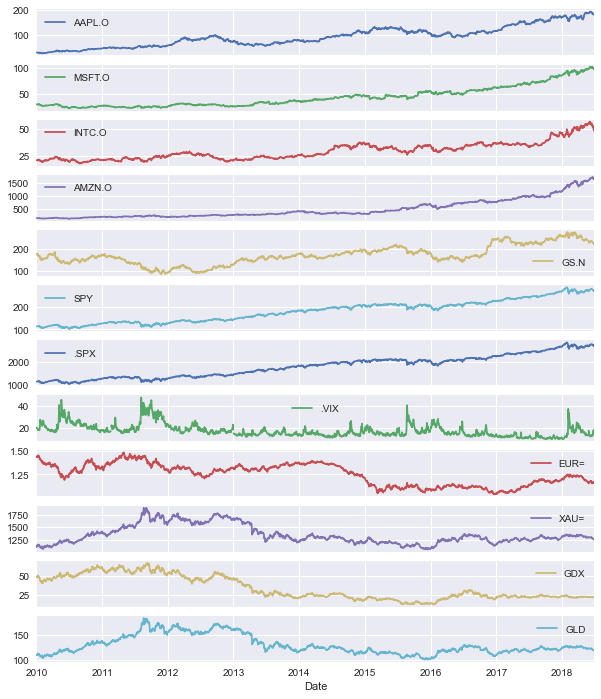

In [32]:
data.plot(figsize=(10,12),subplots=True)

<AxesSubplot:>

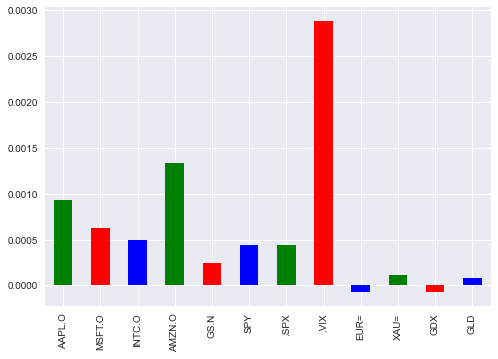

In [33]:
# pct_change表示当前元素与先前元素的相差百分比
# kind='bar',color=['g','r','b']表示绘制柱状图，有g(GREEN),r(RED),b(BLUE)
data.pct_change().mean().plot(kind='bar',color=['g','r','b'])

In [34]:
# data.shift（1)表示将数据向下移动一位
rets = np.log(data / data.shift(1))


In [35]:
# 每一天 相对于 初始日期的 收益率
# cumsum函数用于计算各行累加值
pr = np.cumsum(rets).apply(np.exp)

<AxesSubplot:xlabel='Date'>

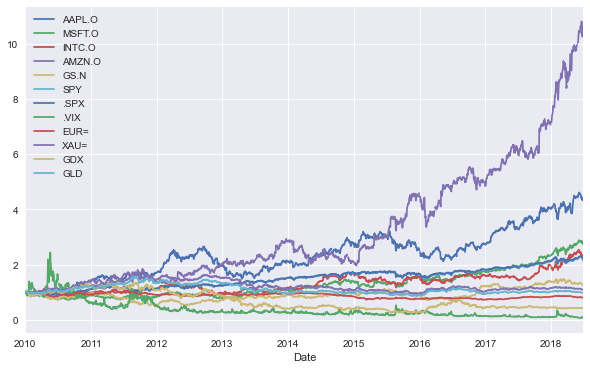

In [36]:
# 绘图，设置长为10，宽为6
pr.plot(figsize=(10,6))

### 投资分析
1. 双均线分析策略
2. 短期/长期均线分析
3. 黄金交叉/死亡交叉

In [37]:
windows = 50

In [67]:
# 1. 筛选出 APPLE 的股票曲线

apple = data[['AAPL.O']].dropna()

In [75]:
# 2. 双均线分析
apple['short'] = apple['AAPL.O'].rolling(window=50).mean()
apple['long'] = apple['AAPL.O'].rolling(window=250).mean()

<AxesSubplot:xlabel='Date'>

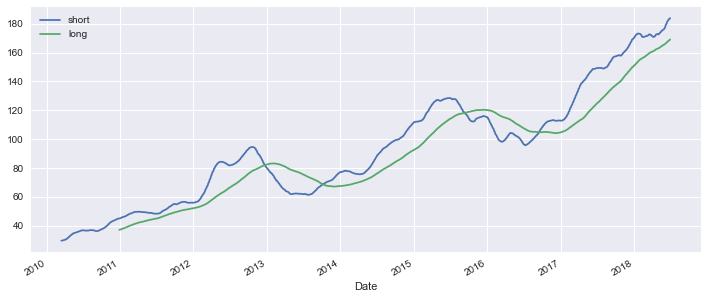

In [76]:
apple[['short','long']].plot(figsize=(12,5))

In [79]:
apple['postion'] = np.where(apple['short'] > apple['long'],1,-1)

<AxesSubplot:xlabel='Date'>

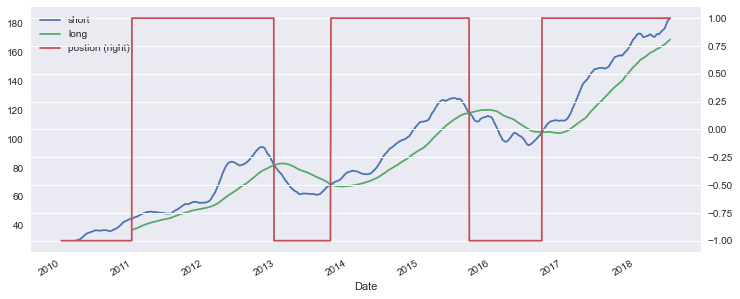

In [82]:
apple[['short','long','postion']].plot(figsize=(12,5),secondary_y='postion')